In [1]:
## Imports
from scipy.io import loadmat
import os
import numpy as np

In [2]:
## Directories 
train_c0 = './train/class0/'
train_c1 = './train/class1/'
test_c0 = './test/class0/'
test_c1 = './test/class1/'

In [3]:
## Getting number of samples
n_train_c0 = len(os.listdir(train_c0))
n_train_c1 = len(os.listdir(train_c1))
print(n_train_c0, n_train_c1)

n_test_c0 = len(os.listdir(test_c0))
n_test_c1 = len(os.listdir(test_c1))
print(n_test_c0, n_test_c1)

1253 1087
150 116


In [4]:
## pre-processing train data
X_train_c0 = os.listdir(train_c0)    
y_train_c0 = np.full((1,n_train_c0), 0)
X_train_c1 = os.listdir(train_c1)
y_train_c1 = np.full((1,n_train_c1), 1)

## pre-processing test data
X_test_c0 = os.listdir(test_c0)    
y_test_c0 = np.full((1,n_test_c0), 0)
X_test_c1 = os.listdir(test_c1)
y_test_c1 = np.full((1,n_test_c1), 1)

In [5]:
## Train Data
X_c0_train = []
X_c1_train = []

for train_sample in range(len(X_train_c0)):
    #print(train_c0+X_train_c0[train_sample])
    t_sample = loadmat(train_c0+X_train_c0[train_sample])['normalize'].flatten()
    if len(t_sample) < 34:
        #print("[current len] ", len(t_sample))
        padding = np.zeros(34-len(t_sample))
        t_sample = np.concatenate((t_sample, padding), axis=0)
    X_c0_train.append(t_sample)
    #print(len(t_sample))
    
for train_sample in range(len(X_train_c1)):
    #print(train_c1+X_train_c1[train_sample])
    t_sample = loadmat(train_c1+X_train_c1[train_sample])['normalize'].flatten()
    if len(t_sample) < 34:
        padding = np.zeros(34-len(t_sample))
        t_sample = np.concatenate((t_sample, padding), axis=0)
    X_c1_train.append(t_sample)
    #print(len(t_sample))

X_train = X_c0_train + X_c1_train

In [6]:
## Test Data
X_c0_test = []
X_c1_test = []

for test_sample in range(len(X_test_c0)):
    #print(test_c0+X_test_c0[test_sample])
    t_sample = loadmat(test_c0+X_test_c0[test_sample])['normalize'].flatten()
    if len(t_sample) < 34:
        padding = np.zeros(34-len(t_sample))
        t_sample = np.concatenate((t_sample, padding), axis=0)
    X_c0_test.append(t_sample)

for test_sample in range(len(X_test_c1)):
    #print(test_c1+X_test_c1[test_sample])
    t_sample = loadmat(test_c1+X_test_c1[test_sample])['normalize'].flatten()
    if len(t_sample) < 34:
        padding = np.zeros(34-len(t_sample))
        t_sample = np.concatenate((t_sample, padding), axis=0)
    X_c1_test.append(t_sample)

X_test = X_c0_test + X_c1_test

In [7]:
## Train labels
y_train = np.concatenate((y_train_c0, y_train_c1),axis=1)
y_train = y_train[0]

## Test labels
y_test = np.concatenate((y_test_c0, y_test_c1),axis=1)
y_test = y_test[0]

## check shapes
print(y_train.shape)
print(y_test.shape)

(2340,)
(266,)


In [8]:
X_train

[array([-0.70650461, -0.55054256, -0.50819889, -0.75446298,  0.13585048,
        -0.64678276,  0.76766212, -0.62350871, -1.18350961,  1.24010846,
         1.49470052,  1.33518855,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]),
 array([-0.17805257, -0.50931266,  0.09638538, -0.7672386 , -0.64217987,
        -0.79805006,  1.29314183,  0.02669575, -2.03604241, -1.03540246,
        -0.32683165, -0.09373267,  0.95789463,  0.13557123, -0.00368   ,
         0.89230135,  0.83936467,  2.14916813,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ]),


In [9]:
## remove nans
X_train = np.array(X_train)
where_are_NaNs = np.isnan(X_train)
X_train[where_are_NaNs] = 0

X_test = np.array(X_test)
where_are_NaNs = np.isnan(X_test)
X_test[where_are_NaNs] = 0

In [10]:
## Using SVM Classifier
from sklearn.svm import LinearSVC

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)

/home/snow/.local/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [11]:
## Accuracy
clf.score(X_test, y_test)

0.6428571428571429

In [12]:
## using poly kernel with cross validation
from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(kernel='poly', C=1, gamma='scale')
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores

array([0.7228145 , 0.73773987, 0.69871795, 0.72376874, 0.76659529])

In [13]:
## using rbf kernel with cross validation
from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(kernel='rbf', C=5, gamma='scale')
scores = cross_val_score(clf, X_train, y_train, cv=5)
scores

array([0.76545842, 0.76332623, 0.73076923, 0.72805139, 0.75588865])

In [14]:
## using KNN classifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=29)
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=29, p=2,
           weights='uniform')

In [15]:
## Accuracy
neigh.score(X_test, y_test)

0.6428571428571429

In [16]:
## Training a MLP (Neural Network) using Keras framework

In [17]:
## Imports
from keras.models import Sequential
from keras import layers
from keras.layers import Dense

Using TensorFlow backend.


In [38]:
# create model
model = Sequential()
model.add(Dense(128, input_dim=34, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(layers.Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [39]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [40]:
# Fit the model
#model.fit(X_train, y_train, epochs=50, batch_size=64)
history = model.fit(X_train, y_train, validation_split=0.1, epochs=30, batch_size=32)

Train on 2106 samples, validate on 234 samples
Epoch 1/30
2106/2106 [==============================] - 1s 329us/step - loss: 0.6107 - acc: 0.6557 - val_loss: 0.8043 - val_acc: 0.5726
Epoch 2/30
2106/2106 [==============================] - 0s 167us/step - loss: 0.5692 - acc: 0.6923 - val_loss: 0.6937 - val_acc: 0.6410
Epoch 3/30
2106/2106 [==============================] - 0s 145us/step - loss: 0.5338 - acc: 0.7241 - val_loss: 0.6540 - val_acc: 0.6880
Epoch 4/30
2106/2106 [==============================] - 0s 132us/step - loss: 0.5189 - acc: 0.7308 - val_loss: 0.7036 - val_acc: 0.6282
Epoch 5/30
2106/2106 [==============================] - 0s 129us/step - loss: 0.5044 - acc: 0.7555 - val_loss: 0.5679 - val_acc: 0.7479
Epoch 6/30
2106/2106 [==============================] - 0s 107us/step - loss: 0.4885 - acc: 0.7574 - val_loss: 0.5874 - val_acc: 0.7009
Epoch 7/30
2106/2106 [==============================] - 0s 127us/step - loss: 0.4698 - acc: 0.7844 - val_loss: 0.6659 - val_acc: 0.6325
E

In [41]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

266/266 [==============================] - 0s 84us/step

acc: 62.03%


In [42]:
## model summary 
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 128)               4480      
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 65        
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________________________________________________


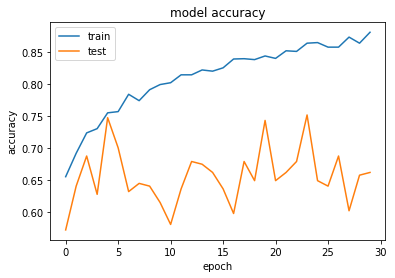

In [43]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

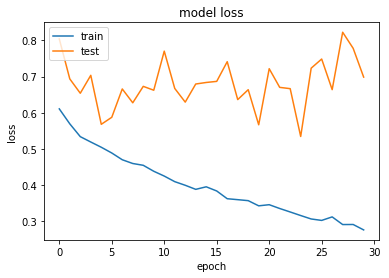

In [44]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [45]:
## [Reported Accuracy]

# Train accuracy: 88.13%
# Test accuracy: 62:03%